<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/7-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) =\
  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow import keras

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1,28*28)

train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)

In [ ]:
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')

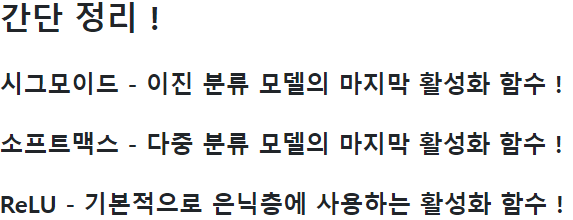

In [ ]:
model=keras.Sequential([dense1,dense2])

In [ ]:
model.summary() # 층에 대한 정보를 얻음
 # 입력층 784개, 은닉층 100개+100 78500개

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


###층 추가하기

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),name='hidden'), # 은닉층
    keras.layers.Dense(10,activation='softmax',name='output') # 출력층
], name='패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model=keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid',input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
a=int(input("에포크 지정 : "))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # 스파스 카테고리컬 크로스엔트로피
model.fit(train_scaled, train_target, epochs=a)

에포크 지정 : 5
Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.4465 - accuracy: 0.8402
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3939 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3659 - accuracy: 0.8678
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3458 - accuracy: 0.8740
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3288 - accuracy: 0.8811


###ReLU
 * 출력에 대해 더욱 신속하게 하기 위해 만들어짐
 * 은닉층에서 빠르게 수행시킴

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu')) # 시그모이드 대신 렐루
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

train_scaled=train_input/255.0

train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled, train_target,test_size=0.2,random_state=42)

In [ ]:
a=int(input("에포크 지정 : "))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # 스파스 카테고리컬 크로스엔트로피
model.fit(train_scaled, train_target, epochs=a)

에포크 지정 : 5
Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5324 - accuracy: 0.8126
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3934 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3539 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3333 - accuracy: 0.8804
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3190 - accuracy: 0.8851


In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3628 - accuracy: 0.8704


[0.3627711534500122, 0.8704166412353516]

###옵티마이저
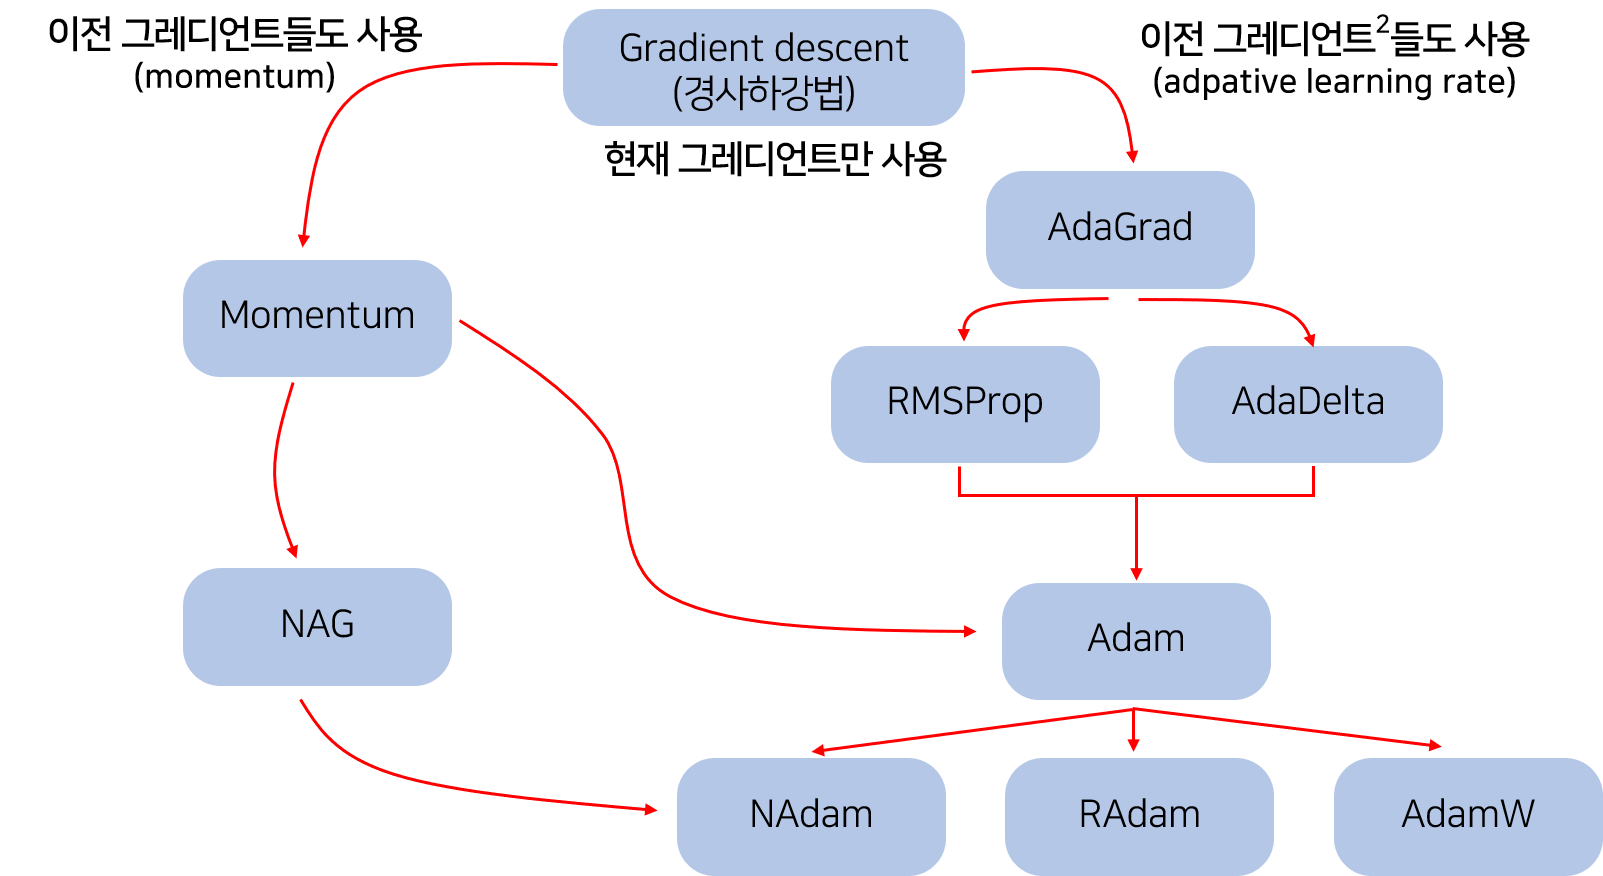

 * adagrad는 그레이디언트 제곱을 누적해 학습률 나눔
 * RMSprop은 최근 그레이디언트 사용하려 지수 감소 사용
 * Adam은 지수 감소 평균 조절 제곱한 지수 감소 평균 조절

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

model.fit(train_scaled, train_target, epochs=9)

Epoch 1/9
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2958 - accuracy: 0.8902
Epoch 2/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2791 - accuracy: 0.8969
Epoch 3/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9004
Epoch 4/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9035
Epoch 5/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9068
Epoch 6/9
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2412 - accuracy: 0.9101
Epoch 7/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2318 - accuracy: 0.9136
Epoch 8/9
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2257 - accuracy: 0.9142
Epoch 9/9
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2192 - accuracy: 0.9183


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3108 - accuracy: 0.8917


[0.3108176589012146, 0.8917499780654907]

In [ ]:
 # 최적점에 가까워질수록 학습률 낮출 수 있는데 이 학습률을 적응적 학습률이라고 한다